<a href="https://colab.research.google.com/github/iainwo/life-of-iain/blob/main/0_1_1_method_of_exhaustion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two Basic Concepts of Calc

1. measure the aread of a regon
2. measure steepness of line

# Method of Exhaustion

## Method

Historical method by greeks, consisting of:

1. find a region to measure
2. approximate the region of #1 with a easily measured polygon
3. improve the approximation by increasing the number of sides on the polygon
4. repeat

## Method for Parabolic Segments

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# parabola
f = lambda x: x**2
x = np.linspace(0, 10)
y = f(x)

# ordinates
xi = 
ordinate_i = np.linspace(0, f(xi))

xj = 10
ordinate_j = np.linspace(0, f(xj))

ValueError: ignored

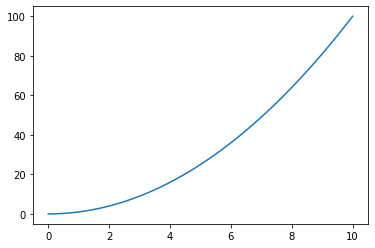

In [ ]:
plt.figure()


#
plt.subplot()
plt.plot(x, y)
plt.plot(xi, ordinate_i)
plt.plot(ordinate_j)
plt.title("Parabolic Segment")
plt.grid(True)


plt.show()